# Classification

In [16]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from dtreeviz.trees import dtreeviz 
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [17]:
dt = pd.read_csv('dt.csv')

dt.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [18]:
d = {'UK':0, 'USA':1, 'N':2}
dt['Nationality'] = dt['Nationality'].map(d)

d  = {'YES':1, 'NO':0,}
dt['Go'] = dt['Go'].map(d)

print(dt)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35           1     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [19]:
X = dt.drop(['Go'],axis=1)
y = dt['Go']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [21]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = dtree.predict(X_test)

In [23]:
dtree.predict([[32,15,7,1]])

array([1], dtype=int64)

In [24]:
dtree.score(X_test,y_test)

1.0

In [25]:
accuracy_score(y_test,y_pred)


1.0

In [26]:
text_re = tree.export_text(dtree)
print(text_re)

|--- feature_2 <= 6.50
|   |--- class: 0
|--- feature_2 >  6.50
|   |--- feature_1 <= 9.50
|   |   |--- class: 1
|   |--- feature_1 >  9.50
|   |   |--- feature_1 <= 11.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  11.50
|   |   |   |--- class: 1



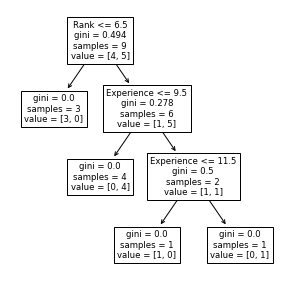

In [27]:
features = ['Age', 'Experience', 'Rank', 'Nationality'] # or may be X.head(0).columns
fig = plt.figure(figsize=(5,5))
_ = tree.plot_tree(dtree,feature_names=features)

In [28]:
fig.savefig('DecisionTree.png')

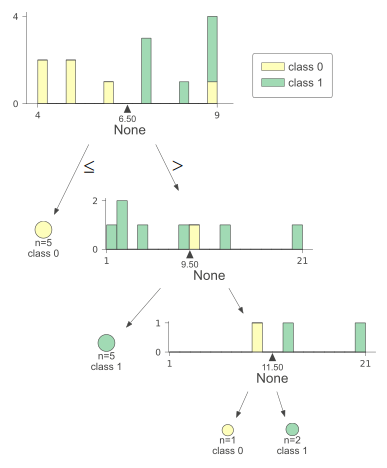

In [29]:
viz = dtreeviz(dtree,X,y,scale=1.5)
viz

In [30]:
a = DecisionTreeRegressor()
a.fit(X_train,y_train)

y_pred = a.predict(X_test)
accuracy_score(y_test,y_pred)

NameError: name 'DecisionTreeRegressor' is not defined

# Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('data.csv')
data = data[data['Make']=='Volkswagen']
data.dropna()
X = data['Engine HP']
y = data['MSRP']
X = np.array(X)
X = X.reshape((-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
d_reg = DecisionTreeRegressor()
d_reg.fit(X_train,y_train)

In [ ]:
plt.scatter(X,y)

In [ ]:
y_pred = d_reg.predict(X_test)

In [ ]:
d_reg.score(X_test,y_test)